In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Datasets/SurfaceCrackDetectionReduced.zip

Archive:  gdrive/MyDrive/Datasets/SurfaceCrackDetectionReduced.zip
  inflating: Negative/00001.jpg      
  inflating: Negative/00002.jpg      
  inflating: Negative/00003.jpg      
  inflating: Negative/00004.jpg      
  inflating: Negative/00005.jpg      
  inflating: Negative/00006.jpg      
  inflating: Negative/00007.jpg      
  inflating: Negative/00008.jpg      
  inflating: Negative/00009.jpg      
  inflating: Negative/00010.jpg      
  inflating: Negative/00011.jpg      
  inflating: Negative/00012.jpg      
  inflating: Negative/00013.jpg      
  inflating: Negative/00014.jpg      
  inflating: Negative/00015.jpg      
  inflating: Negative/00016.jpg      
  inflating: Negative/00017.jpg      
  inflating: Negative/00018.jpg      
  inflating: Negative/00019.jpg      
  inflating: Negative/00020.jpg      
  inflating: Negative/00021.jpg      
  inflating: Negative/00022.jpg      
  inflating: Negative/00023.jpg      
  inflating: Negative/00024.jpg      
  inflating: Negative

In [ ]:
directory = '/content/'
labels = ['Negative', 'Positive']     #These are the labels
dataset = []
img_size = 224                        #Use this to normalize the size of the image

for i in labels:
  #Contains the path of the folder along with each of the image containing folder.
  path_new = os.path.join(directory, i)
  label = labels.index(i)   #Takes 0 as Negative and 1 as Positive
  print(path_new)
  for image in os.listdir(path_new):
    image_array = cv2.imread(os.path.join(path_new,image), 0)
    dataset.append([cv2.resize(image_array, (img_size,img_size)), label])

/content/Negative
/content/Positive


In [ ]:
len(dataset)

2000

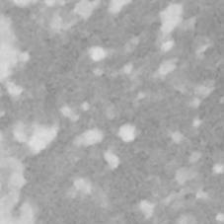

In [ ]:
#Checking if the image is visible
cv2_imshow(dataset[54][0])

In [ ]:
#Splitting the dataset into testing and training sets
x_train = []
y_train = []
for feature, label in dataset:
  x_train.append(feature)
  y_train.append(label)

x_train = np.array(x_train)/ 255
y_train = np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)

In [ ]:
#Now making the CNN
model = Sequential()

#Adding the first layer to the CNN
model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(img_size,img_size,1)))
model.add(MaxPool2D())
model.add(Dropout(0.25))                  #Dropping 25% of the neurons to prevent overfitting

#Adding the second layer tho the CNN
model.add(Conv2D(32,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.5))                   #Dropping 50% of the neurons to prevent overfitting

#The final layer
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [ ]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss = keras.losses.SparseCategoricalCrossentropy())

In [ ]:
#Training the model to check it's accuracy
history = model.fit(x_train, y_train, validation_split=0.2, epochs = 10)

Epoch 1/10
50/50 [==============================] - 84s 2s/step - loss: 23.1533 - accuracy: 0.5044 - val_loss: 0.8793 - val_accuracy: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 83s 2s/step - loss: 0.6376 - accuracy: 0.6047 - val_loss: 0.8877 - val_accuracy: 0.0000e+00
Epoch 3/10
50/50 [==============================] - 83s 2s/step - loss: 0.5682 - accuracy: 0.6547 - val_loss: 0.7018 - val_accuracy: 0.4625
Epoch 4/10
50/50 [==============================] - 83s 2s/step - loss: 0.4218 - accuracy: 0.8093 - val_loss: 0.0590 - val_accuracy: 0.9900
Epoch 5/10
50/50 [==============================] - 84s 2s/step - loss: 0.2180 - accuracy: 0.9271 - val_loss: 0.0438 - val_accuracy: 0.9900
Epoch 6/10
50/50 [==============================] - 83s 2s/step - loss: 0.1284 - accuracy: 0.9588 - val_loss: 0.0380 - val_accuracy: 0.9975
Epoch 7/10
50/50 [==============================] - 83s 2s/step - loss: 0.1121 - accuracy: 0.9711 - val_loss: 0.0391 - val_accuracy: 0.9975
Epoch 8/10
